In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pylj import mc, comp, util, sample, pairwise

# Atomistic simulation

The use of computers in chemistry is becoming more and more commonplace with increases computational resource and more efficient and effective algorithms. Computer simulation of atomic and molecular species takes two "flavours":

- **Quantum calculations**: where approxmations are made to the Schrödinger equation to allow for its calculation for a multi-electron system (more information about this can be found in Atkins & Friedman's *Molecular Quantum Mechanics*),
- **Classical simulations**: where model interactions between atoms are developed to allow chemical systems to be simulated,

This exercise will focus on the latter.

## Classical simulation

One of the most popular models used to simulate interparticle interactions is known as the **Lennard-Jones** function. This models the London dispersion interactions between atoms. Hopefully the London dispersion interactions are familiar as consisting of: 

- **van der Waals attraction**: the attraction between atoms that occurs as a result of the formation of intantenous dipole formation,
- **Pauli's exclusion principle**: the repulsion which stops atoms overlapping as no two electrons can have the same quantum state. 

This means that the Lennard-Jones function is attractive when particles are close enough to induce dipole formation but **very** repulsive when the particles are too close. The Lennard-Jones function has the following form,

$$ E(r) = \frac{A}{r^{12}} - \frac{B}{r^6}, $$

where $E(r)$ is the potential energy at a given distance $r$, while $A$ and $B$ are parameters specific to the nature of the given interaction. In the cell below, write a function to calculate the energy of an interaction between two argon atoms for given range of distances using the Lennard-Jones function as the model.

In [ ]:
def lennard_jones(A, B, r):
    return ◽◽◽

Then use this function to plot the potential energy from $r=3$ Å to $r=8$ Å, and discuss the shape and sign of this function in terms of the attractive and repulsive regimes, when the values of ε and σ are as follows.

| A/$\times10^{-134}$Jm$^{12}$ | B/$\times10^{-78}$Jm$^6$ |
|:------:|:------:|
| 1.36 | 9.27 |

In [ ]:
r = np.linspace( ◽◽◽, ◽◽◽, ◽◽◽ )
E = ◽◽◽
plt.plot( ◽◽◽, ◽◽◽ )
plt.xlabel( ◽◽◽ )
plt.ylabel( ◽◽◽ )
plt.show()

We are going to use the software pylj. This is a Python library, which means it is a collection of functions to enable the simulation by Monte Carlo. An example of a function in pylj is the `pairwise.lennard_jones_energy`, which can be used similar to the `lennard_jones` function that you have defined above.

In [ ]:
r = np.linspace( 3e-10, 8e-10, 100 )
E = pairwise.lennard_jones_energy(1.36e-134, 9.27e-78, r)
plt.plot( r, E )
plt.xlabel( 'r/m' )
plt.ylabel( 'E/J' )
plt.show()

In addition to the functions associated directly with the Monte Carlo simulations, pylj is also useful for the visualisation of simulations (an example of a visualiation environment in pylj is shown below).

<img src="fig1.png" width="500px">
*Figure 1. The Energy sampling class in pylj.*

In this exercise, we will use pylj to help to build a Monte Carlo simulation where the total energy of the system is found using a Lennard-Jones potential. 

## Monte Carlo

Monte Carlo or MC is a broad class of simulation method for determining equilibrium properties about a system. Monte Carlo is in many ways similar to [molecular dynamics](../molecular_dynamics/intro_to_molecular_dynamics.ipynb) however it makes use of statistical mechanics in lieu of molecular dynamics. Therefore, instead of dynamical information, the information generated is accoprding to Boltzmann probabilities. The algorithm that is used in Monte Carlo simulations are as follows:

1. initialise the system,
2. calculate the energy of the system,
3. suggest some change to the system,
4. calculate the energy with this change,
5. if some condition is true, accept the change,
6. go to step 3.

This process continues for as long as the scientist is interested in.

### Initialisation 

Lets try and use pylj to initialise our system, to do this we use the function `mc.initialise`. This function takes 4 inputs:
- number of particles, 
- temperature of the simulation, 
- size of the simulation cell,
- how the particles should be distributed.

The first line is to set up the visualisation environment within the Jupyter notebook, and the third line then sets and plots the particular enivornment that you want (in this case the `JustCell` environment).

<IPython.core.display.Javascript object>


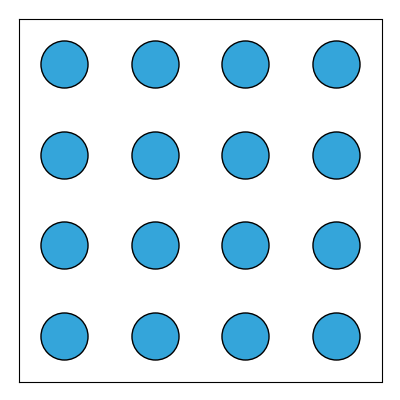

In [5]:
%matplotlib notebook
simulation = mc.initialise(16, 300, 20, 'square')
sample_system = sample.JustCell(simulation)

In the above example, a `square` distribution of particles is assigned, however, it is also possible to distribute the particles randomly through the cell (with the keyword `random`), try this out in the cell above. 

### Calculate energy 

The next step is to find the energy of the system. This is achieved by summing the value for each interaction in the system. The example above has 16 atoms, the number of interactions in a *pairwise* method such as Monte Carlo is found with the following equation, 

$$ \frac{(N - 1)N}{2}, $$

define a function to determine the number of interactions below. 

In [6]:
def number_of_interactions( ◽◽◽ ):
    ◽◽◽

SyntaxError: invalid character in identifier (<ipython-input-6-dfabd493c8c1>, line 1)

pylj has a function for the determination of the energy of each interaction, `pairwise.compute_energy`. This can be run as follows. 

In [7]:
simulation.compute_energy()
old_energies = simulation.energies
print(old_energies)

[-5.3764352e-22 -9.2593700e-24 -5.3764352e-22 -5.3764352e-22
 -7.3311680e-23  0.0000000e+00 -7.3311680e-23 -9.2593700e-24
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -5.3764352e-22
 -7.3311680e-23  0.0000000e+00 -7.3311680e-23 -5.3764352e-22
 -9.2593700e-24 -7.3311680e-23 -5.3764352e-22 -7.3311680e-23
  0.0000000e+00  0.0000000e+00 -9.2593700e-24  0.0000000e+00
  0.0000000e+00 -7.3311680e-23 -5.3764352e-22 -7.3311680e-23
  0.0000000e+00 -5.3764352e-22  0.0000000e+00 -7.3311680e-23
 -5.3764352e-22 -7.3311680e-23  0.0000000e+00  0.0000000e+00
 -9.2593700e-24  0.0000000e+00  0.0000000e+00 -7.3311680e-23
 -5.3764352e-22 -7.3311680e-23 -7.3311680e-23  0.0000000e+00
 -7.3311680e-23 -5.3764352e-22  0.0000000e+00  0.0000000e+00
  0.0000000e+00 -9.2593700e-24 -7.3311680e-23  0.0000000e+00
 -7.3311680e-23 -5.3764352e-22 -5.3764352e-22 -9.2593700e-24
 -5.3764352e-22 -5.3764352e-22 -7.3311680e-23  0.0000000e+00
 -7.3311680e-23 -9.2593700e-24  0.0000000e+00  0.0000000e+00
  0.0000000e+00 -5.37643

If the particles are more than 15 Å (or half the box length if the box length is less than 30 Å), the energy is automatically assigned as 0, since the particles are considered to be far enough apart that there interaction is neglible.

### Make a change

Then a change is made to the system, in Monte Carlo generally this can be a wide variety of types of change, such as the number of particles, their position, and the volume of the system. We will focus on modifying the positions of the particles, which is achieved through the following pair of functions.

In [8]:
random_particle = simulation.select_random_particle()
simulation.new_random_position(random_particle)

TypeError: new_random_position() takes 1 positional argument but 2 were given

If we then print the energies of the interactions again hopefully it is possible to see the difference. 

In [9]:
simulation.compute_energy()
new_energies = simulation.energies
print(new_energies)

[-5.3764352e-22 -9.2593700e-24 -5.3764352e-22 -5.3764352e-22
 -7.3311680e-23  0.0000000e+00 -7.3311680e-23 -9.2593700e-24
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -5.3764352e-22
 -7.3311680e-23  0.0000000e+00 -7.3311680e-23 -5.3764352e-22
 -9.2593700e-24 -7.3311680e-23 -5.3764352e-22 -7.3311680e-23
  0.0000000e+00  0.0000000e+00 -9.2593700e-24  0.0000000e+00
  0.0000000e+00 -7.3311680e-23 -5.3764352e-22 -7.3311680e-23
  0.0000000e+00 -5.3764352e-22  0.0000000e+00 -7.3311680e-23
 -5.3764352e-22 -7.3311680e-23  0.0000000e+00  0.0000000e+00
 -9.2593700e-24  0.0000000e+00  0.0000000e+00 -7.3311680e-23
 -5.3764352e-22 -7.3311680e-23 -7.3311680e-23  0.0000000e+00
 -7.3311680e-23 -5.3764352e-22  0.0000000e+00  0.0000000e+00
  0.0000000e+00 -9.2593700e-24 -7.3311680e-23  0.0000000e+00
 -7.3311680e-23 -5.3764352e-22 -5.3764352e-22 -9.2593700e-24
 -5.3764352e-22 -5.3764352e-22 -7.3311680e-23  0.0000000e+00
 -7.3311680e-23 -9.2593700e-24  0.0000000e+00  0.0000000e+00
  0.0000000e+00 -5.37643

### Find the new energy

The total energy of the system in Monte Carlo is generally in the units of joules per atom (or molecule). Define below a function to calculate the total energy from the energy of the individual interactions. 

In [10]:
def total_energy( ◽◽◽, ◽◽◽ ):
    ◽◽◽

SyntaxError: invalid character in identifier (<ipython-input-10-f24b7a8a075f>, line 1)

### Comparing the energies

It is then possible to compare the energy of the system before and after the move.

In [11]:
if total_energy( new_energy, ◽◽◽ ) < total_energy( old_energy, ◽◽◽ ):
    print('The energy has decreased!')
else:
    print('The energy increased :(')

SyntaxError: invalid character in identifier (<ipython-input-11-1079ac9f9dc1>, line 1)

However, we are not just interested in if the energy has decreased as we want Boltzmann probabilities of the possible states. This requires the Metropolis condition, where the change is accepted if, 

$$ n < \exp{\bigg(\frac{E_{\text{new}} - E_{\text{old}}}{k_BT}\bigg)}, $$  

where $n\sim U(0, 1)$, $k_B$ is the Boltzmann constant, and $T$ is the temperature. This is implimented in pylj using the `mc.metropolis` function.

In [12]:
mc.metropolis(300, total_energy(old_energies, ◽◽◽ ), total_energy(new_energies, ◽◽◽ ))

SyntaxError: invalid character in identifier (<ipython-input-12-800176666a7e>, line 1)

This returns `True` if the move should be accepted and `False` if it should be rejected. Plot the new configuration of your system using the following cell and comment in whether the move was accepted or rejected (note that this updates the original plotting of the cell so you need to scroll up to observe the change). 

In [13]:
sample_system.update(simulation)

### Accept and reject

pylj also has functions built in to accept and reject the moves that are proposed. These take the following forms, 

```python

accept()

reject()

```

Using this knowledge, attempt to build you own Monte Carlo simulation loop, using the `update` to present the changes to the simulation visualisation (note that this is the slowest part of the computation so it is recommended that you don't perform this every iteration). 

In [15]:
# Cell for building MC simulation. 